### Requirements
-----

In [1]:
import pandas as pd
pd.__version__

'1.5.3'

In [2]:
import numpy as np
np.__version__

'1.26.4'

In [3]:
import matplotlib
matplotlib.__version__

'3.9.0'

-----

Exploratory Data Analysis
-----

In [4]:
df = pd.read_csv('data/data.csv', header=0, sep='|')
df['month'] = pd.to_datetime(df.day).apply(lambda x: x.month)
df.sample(10)

,hits,visits,day,identifier,orders,amount,product_pages,direct_visit,organic_visit,paid_search_visit,email_visit,month
189,882280,89439,2020-03-31,96,3909,3.237642e+05,541089,290179,156719,25718,0,3
1561,2051548,419790,2019-12-06,45,66285,4.762307e+06,609249,382196,149080,192962,35,12
1145,1508352,292448,2020-04-22,15,4784,6.692091e+05,372232,209166,81447,149398,808,4
2809,1464864,297484,2019-05-15,36,26193,4.609207e+06,458826,216267,94504,106949,8555,5
1259,923796,190364,2019-09-23,45,15310,8.475199e+05,291804,197473,47041,82245,12,9
179,75694,19197,2019-06-06,96,57540,2.395602e+06,8831,4259,4360,187,8,6
2852,1988807,405921,2020-02-08,36,54333,1.049717e+07,669218,292125,126622,193111,12906,2
1495,1125252,207640,2020-04-09,45,7818,5.232299e+05,268872,166459,66064,92512,0,4
732,945017,87467,2020-04-22,43,601,1.582234e+05,288688,278131,334009,118422,39393,4
3066,1800044,367269,2019-08-02,36,33247,6.420017e+06,529956,246737,108351,116474,18981,8


### pandas

In [5]:
pd.crosstab(df.identifier,df.month)

month,1,2,3,4,5,6,7,8,9,10,11,12
identifier,,,,,,,,,,,,
3,31,29,31,45,45,30,31,31,30,31,30,31
13,31,29,29,45,45,30,31,31,30,31,30,31
15,31,29,31,45,45,30,31,31,30,31,30,31
34,31,29,31,45,45,30,31,31,30,31,30,31
36,31,29,31,45,45,30,31,31,30,31,30,31
43,31,29,31,45,45,30,31,31,30,31,30,31
45,31,29,31,45,45,30,31,31,30,31,30,31
96,31,29,31,46,44,30,31,31,30,31,30,31


In [6]:
pd.crosstab(df.identifier,df.month,values=df.orders,aggfunc='sum')

month,1,2,3,4,5,6,7,8,9,10,11,12
identifier,,,,,,,,,,,,
3,1537804,1115207,537063,944001,1989665,1893833,2138844,2342568,1671820,1728354,1415685,1742942
13,21404,12175,5039,11596,22160,19164,25010,15877,14592,15412,15863,24335
15,143635,69290,76481,184474,135676,98052,123463,99682,84511,96938,213427,212164
34,3410034,2487020,1448832,790800,1670782,1757408,2118461,2278508,3666545,4438554,3131970,4819781
36,1138112,918047,540233,755756,1213836,905395,988140,948665,901377,906692,1229129,1826970
43,785840,514178,262542,325060,580669,246632,198723,547917,429992,457481,434128,563670
45,1199883,1107405,633747,203965,1005816,1249791,1332822,785510,610123,934471,1368915,2036568
96,1262002,1370017,729789,1597190,2517278,1592140,1660732,1641217,1348459,1541647,1385466,1261921


In [7]:
df.pivot_table(index='identifier',columns='month',values='orders', aggfunc='sum')

month,1,2,3,4,5,6,7,8,9,10,11,12
identifier,,,,,,,,,,,,
3,1537804,1115207,537063,944001,1989665,1893833,2138844,2342568,1671820,1728354,1415685,1742942
13,21404,12175,5039,11596,22160,19164,25010,15877,14592,15412,15863,24335
15,143635,69290,76481,184474,135676,98052,123463,99682,84511,96938,213427,212164
34,3410034,2487020,1448832,790800,1670782,1757408,2118461,2278508,3666545,4438554,3131970,4819781
36,1138112,918047,540233,755756,1213836,905395,988140,948665,901377,906692,1229129,1826970
43,785840,514178,262542,325060,580669,246632,198723,547917,429992,457481,434128,563670
45,1199883,1107405,633747,203965,1005816,1249791,1332822,785510,610123,934471,1368915,2036568
96,1262002,1370017,729789,1597190,2517278,1592140,1660732,1641217,1348459,1541647,1385466,1261921


### data visualization

In [8]:
from datetime import date, datetime
import calendar
%matplotlib inline

def addNone(data, hubIdName, variableName, dateName, datestr_format='%Y-%m-%d'):
    dataAll = pd.DataFrame()
    for hubId in data[hubIdName].unique():
        dataset = data[data[hubIdName]==hubId]
        start_date = datetime.strptime(dataset[dateName].min(), datestr_format)
        end_date = datetime.strptime(dataset[dateName].max(), datestr_format)
        if (dataset.shape[0]<(end_date-start_date).days+1): # MISSING DATA FOR ID
            days = pd.date_range(start_date, end_date, freq='D').astype(str)
            dataImputed = pd.DataFrame({hubIdName : hubId, dateName : days, variableName : None})
            ind = np.where(np.in1d(dataImputed[dateName], dataset[dateName].astype(str)))
            dataImputed.loc[dataImputed.index[ind],variableName] = dataset[variableName].tolist()            
            dataImputed[dateName] = dataImputed[dateName].astype('datetime64[ns]')
            dataset = dataImputed
        dataAll = pd.concat([dataAll, dataset])
    return dataAll.reset_index(drop=True)

def addCalendar(data, dateName):
    data[dateName] = pd.to_datetime(data[dateName])
    data["week"] = data[dateName].apply(lambda x: x.isocalendar()[1])
    data["month"] = data[dateName].apply(lambda x: x.month)
    data["year"] = data[dateName].apply(lambda x: str(x.year))
    data[dateName] = data[dateName].astype(str)
    data[dateName] = data[dateName].apply(lambda x : x[0:10])    
    return data

def computeAggValues(data, hubTest, timeUnit, hubIdName, variableName, fn="mean"):

    dataOthers = data[data[hubIdName] != hubTest]
    dataHubTest = data[data[hubIdName] == hubTest].reset_index(drop=True)
    dataAgg = pd.DataFrame()

    var = ['year', timeUnit]
    tmp = variableName
    
    if fn=="mean":
        dataTest = dataHubTest.groupby(var)[tmp].agg(lambda x: pd.to_numeric(x).mean()).reset_index(drop=True)

        dataAgg["Mean"] = dataOthers.groupby(var+[hubIdName])[tmp].agg(lambda x: pd.to_numeric(x).mean()).groupby(var).agg(lambda x: pd.to_numeric(x).mean())
        dataAgg["Med"]  = dataOthers.groupby(var+[hubIdName])[tmp].agg(lambda x: pd.to_numeric(x).mean()).groupby(var).agg(lambda x: pd.to_numeric(x).median())
        dataAgg["q75"]  = dataOthers.groupby(var+[hubIdName])[tmp].agg(lambda x: pd.to_numeric(x).mean()).groupby(var).agg(lambda x: pd.to_numeric(x).quantile(0.25))
        dataAgg["q25"]  = dataOthers.groupby(var+[hubIdName])[tmp].agg(lambda x: pd.to_numeric(x).mean()).groupby(var).agg(lambda x: pd.to_numeric(x).quantile(0.75))

    else:
        dataTest = dataHubTest.groupby(var)[tmp].agg(lambda x: pd.to_numeric(x).sum()).reset_index(drop=True)

        dataAgg["Mean"] = dataOthers.groupby(var+[hubIdName])[tmp].agg(lambda x: pd.to_numeric(x).sum()).groupby(var).agg(lambda x: pd.to_numeric(x).mean())
        dataAgg["Med"]  = dataOthers.groupby(var+[hubIdName])[tmp].agg(lambda x: pd.to_numeric(x).sum()).groupby(var).agg(lambda x: pd.to_numeric(x).median())
        dataAgg["q75"]  = dataOthers.groupby(var+[hubIdName])[tmp].agg(lambda x: pd.to_numeric(x).sum()).groupby(var).agg(lambda x: pd.to_numeric(x).quantile(0.25))
        dataAgg["q25"]  = dataOthers.groupby(var+[hubIdName])[tmp].agg(lambda x: pd.to_numeric(x).sum()).groupby(var).agg(lambda x: pd.to_numeric(x).quantile(0.75))

    dataAgg.reset_index(drop=False, inplace=True)    
    
    return dataTest, dataAgg

In [9]:
import matplotlib.pyplot as plt
def myplot(dataHubTest, dataAgg, timeUnit, variableName, yMin=None, yMax=None):

    xticks_step = 14 if timeUnit == "day" else 1

    plt.figure(figsize=(20,10))
    
    plt.plot(dataHubTest, color = 'coral', linewidth=2.5, label = 'Vous')
    plt.plot(dataAgg["Med"], '--', color = 'darkcyan', linewidth=2.5, label = 'median', alpha=0.8)
    plt.plot(dataAgg["q25"], '--', color = 'darkcyan', linewidth=1.5, label = '25%', alpha=0.8)
    plt.plot(dataAgg["q75"], '--', color = 'darkcyan', linewidth=1.5, label = '75%', alpha=0.8)
    plt.fill_between(np.arange(len(dataAgg)), dataAgg["q25"], dataAgg["q75"], color = "powderblue", alpha=0.5)

    var = timeUnit
    plt.xticks(np.arange(0,len(dataAgg),xticks_step), dataAgg[var][np.arange(0,len(dataAgg),xticks_step)], rotation=90)
    plt.yticks(fontsize=20)
    plt.xlabel("\n "+timeUnit, fontsize=20)
    plt.ylabel("\n", fontsize=20)
    plt.xlim(0,len(dataAgg)-1)
    plt.ylim(yMin, yMax) if yMin or yMax else None
    plt.legend(loc = 0, prop={'size': 15})
    plt.grid(axis = "y", color = 'lightgray', alpha = 0.7)
    plt.title("{}".format(variableName), fontsize=25)
   
    return plt.show()

In [10]:
hubIds = (96, 43, 15, 45, 34,  3, 13, 36)
data = df[df['identifier'].isin(hubIds)].reset_index(drop=True).copy()

hubIdName = "identifier"
dateName = "day"

variableName = 'visits/hits'
data[variableName] = data.visits/data.hits*100

data = addNone(data, hubIdName, variableName, dateName)
data = addCalendar(data, dateName)

timeUnit = "day" # month # week
hubTest = 36

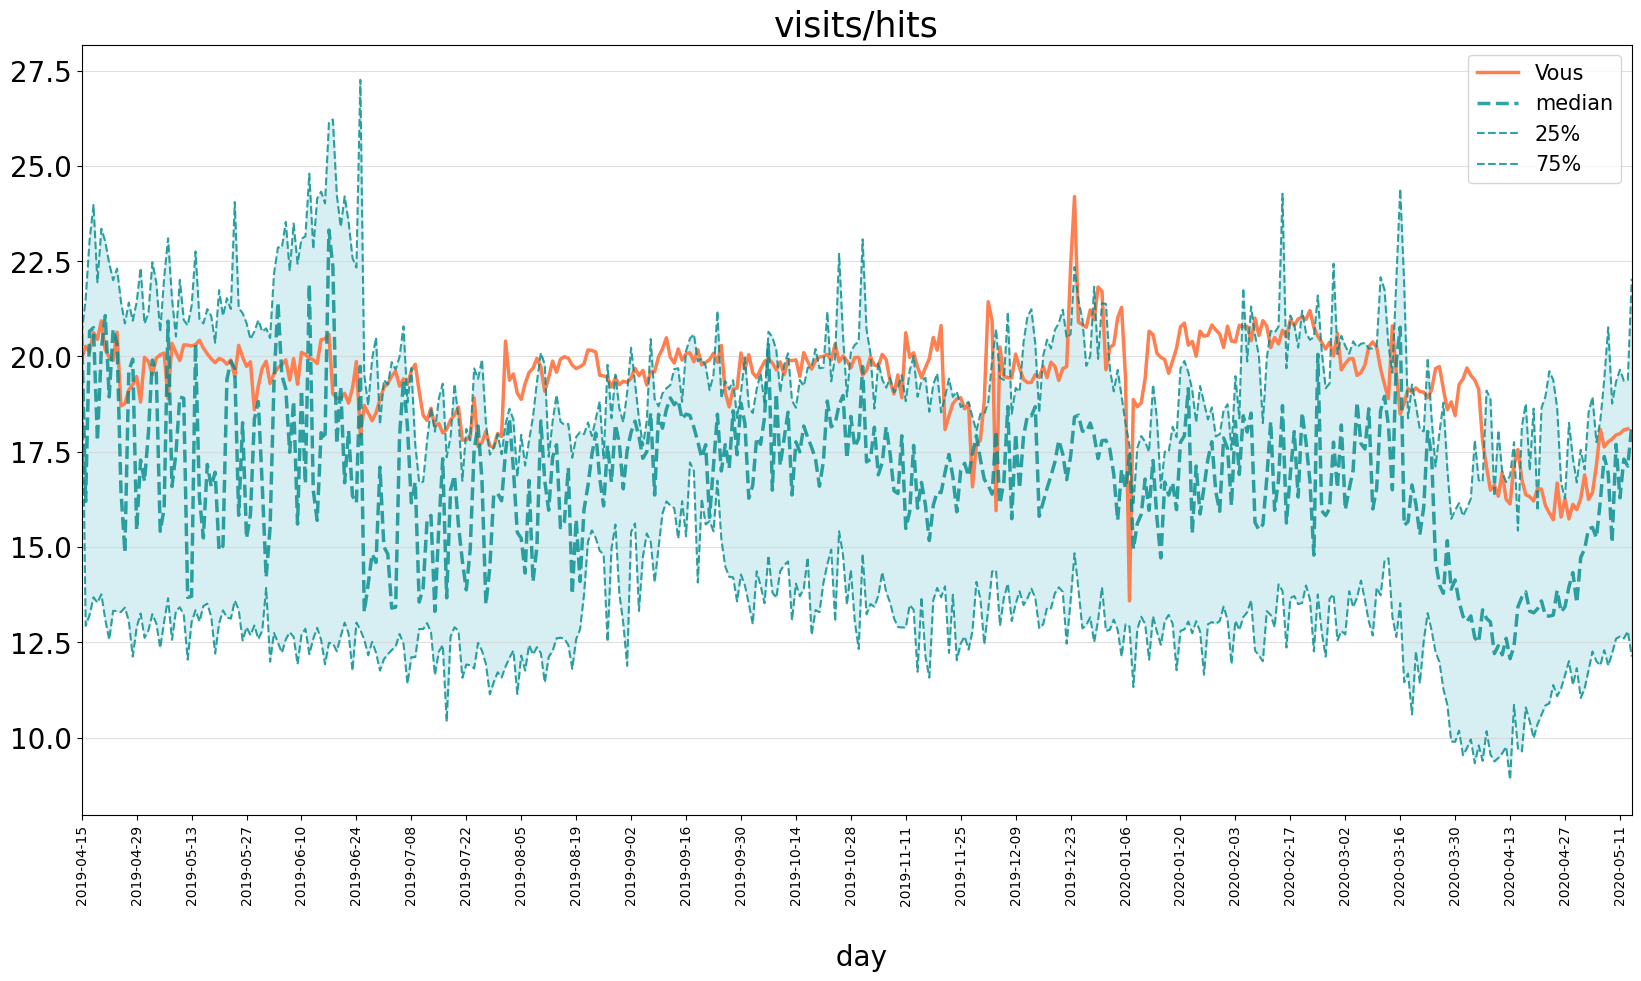

In [11]:
dataTest, dataAgg = computeAggValues(data, hubTest, timeUnit, hubIdName, variableName, fn="mean")
myplot(dataTest, dataAgg, timeUnit, variableName)